<center>
<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/AB.jpeg?raw=true" height="200"> 

# Андан на экономе: домашнее задание 4 
## Проверка гипотез и А/Б-тестирование
</center>


**ФИО: Сокуров Рустам Астемирович**

**id из контеста:**

## Общая информация


__Дата выдачи:__ 17.05.2023

__Мягкий дедлайн:__ 23:59MSK 09.06.2023

__Жесткий дедлайн:__ 23:59MSK 16.06.2023

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. 

> Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

> Фиксируйте все seed'ы, random_state'ы и тд - ваш код должен быть воспроизводим с теми же результатами.

## Формат сдачи

Сам ноутбук называйте в формате hw-04-USERNAME.ipynb, где USERNAME — ваши фамилия и имя. Файл сдаётся в anytask.

## Импорт необходимых библиотек 

Импортируйте все используемые библиотеки здесь.

In [28]:
import pandas as pd 
import numpy as np
import scipy.stats as sts

import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from statsmodels.stats.weightstats import ztest

In [29]:
# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

In [30]:
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (8, 4)

# Часть 1: Процедура проверки гипотез

Для начала повторим теорию проверки гипотез и поотвечаем на различные вопросы. 

> Ниже вас ждут несколько примеров гипотез, на которые вам нужно получить статистически значимые ответы. Вы можете пользоваться встроенными функциями тестов, можете писать свои, а можете использовать с семинаров – это не влияет на полученные баллы. Вы также оставляете за собой право выбрать, проверять гипотезу через `p-value` или по критическим точкам или вообще по доверительным интервалам (но здесь будьте осторожнее, особенно, когда у вас 2 выборки). 

__Здесь важно:__

- Правильно посчитать `p-value` либо наблюдаемое значение критерия (либо дов. интервал);
- Правильно сделать вывод об отвержении / не отвержении нулевой гипотезы;
- Правильно выбрать тест для проверки и обосновать, почему вы выбрали именно его.

Гипотезы проверяйте на $5\%$ уровне значимости

## Задача №1: Экзамен

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/exam.jpeg?raw=true" width="400" align='left'>

У вас есть набор данных об оценках студентов на экзамене. Каждая строка в датасете – отдельный студент. Датасет представляет собой следующие колонки:

* `gender` – пол
* `race/ethnicity` – раса / этническая принадлежность
* `parental level of education` – уровень образования
* `lunch` – получает ли бесплатные обеды (тип питания)
* `test preparation course` – прошел ли курсы по подготовке к тесту
* `math score` – баллы за математику
* `reading score` – баллы за чтение
* `writing score` – баллы за письменность

In [31]:
df = pd.read_csv('data/students_exam.csv')

In [32]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


__а)__ __[5 баллов]__  Проверьте гипотезу о том, что студенты, получившие высшее образование (associate's degree, bachelor's degree, master's degree) в среднем пишут математику на большее число баллов, чем студенты со средним образованием (high school, some high school, some college). 

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: \mu_{high} = \mu_{middle} \\
& H_1: \mu_{high} > \mu_{middle}
\end{aligned}
$$

__Подсказка:__ В тесте 2 выборки: студенты с высшим образованием и со средним. Подумайте о том, как эти выборки связаны между собой. Также обратите внимание на альтернативную гипотезу!

In [33]:
alpha = 0.05 # задаю уровень значимости на будущее
higher_education_sample = df[df['parental level of education'].isin(["associate's degree", "bachelor's degree", "master's degree"])]['math score'].values #здесь хранятся оценки челов с высшим образованием
secondary_education_sample = df[df['parental level of education'].isin(["high school", "some high school", "some college"])]['math score'].values #тут оценки челов со средним образованием
p_val = sts.ttest_ind(higher_education_sample, secondary_education_sample, equal_var=False, alternative='greater', random_state=41)[1]
print(f'P-value равен примерно {round(p_val, 3)}')
if p_val > alpha:
    print('Нулевая гипотеза НЕ отвергается')
else:
    print('Нулевая гипотеза отвергается. Студенты, получившие высшее образование в среднем пишут математику на большее число баллов.')

P-value равен примерно 0.0
Нулевая гипотеза отвергается. Студенты, получившие высшее образование в среднем пишут математику на большее число баллов.


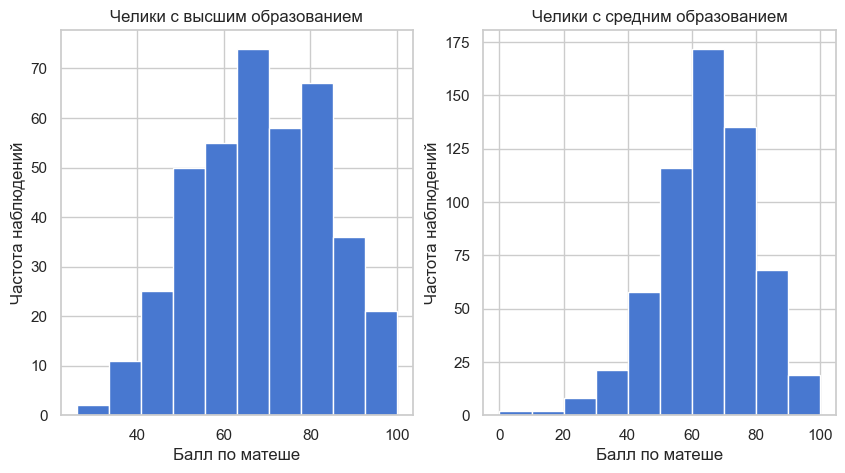

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.hist(higher_education_sample)
ax1.set_title('Челики с высшим образованием')
ax1.set_xlabel('Балл по матеше')
ax1.set_ylabel('Частота наблюдений')

ax2.hist(secondary_education_sample)
ax2.set_title('Челики с средним образованием')
ax2.set_xlabel('Балл по матеше')
ax2.set_ylabel('Частота наблюдений')

plt.show()

__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ Я выбрал двухвыборочный t-test, потому что нам неизвестны истинные значения дисперисии.

У него есть следующий предпосылки:
* **Нормальность распределения случайных величин** - эта предпосылка выполняется, так как, судя по гистограммам реализии выборки, распределение действительно околонормальное
* **Большое количество наблюдений** - наблюдений точно больше 100 в каждом случае, что неплохо
* **Случайные величины незавиимы** - эта предпосылка не совсем выполнена в данном случае, так как, скорее всего, люди, у которых имеется высшее образование, имеется и среднее образование

__б)__ __[5 баллов]__  Правда ли что в среднем студенты пишут экзамен по `reading` так же, как и по `math`? 

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: \mu_{math} = \mu_{reading} \\
& H_1: \mu_{math} \neq \mu_{reading}
\end{aligned}
$$

__Подсказка:__ В тесте 2 выборки: баллы по чтению и баллы по математике. Подумайте о том, как эти выборки связаны между собой. Также обратите внимание на альтернативную гипотезу!

In [35]:
math_sample = df['math score'].values #здесь хранятся резултаты по матеше
reading_sample = df['reading score'].values # здесь хранятся результаты по чтению
p_val = sts.ttest_rel(math_sample, reding_sample)[1]
print(f'P-value равен примерно {round(p_val, 3)}')
if p_val > alpha:
    print('Нулевая гипотеза НЕ отвергается')
else:
    print('Нулевая гипотеза отвергается. В срднем студенты пишут эти экзамены не одинаково.')

P-value равен примерно 0.0
Нулевая гипотеза отвергается. В срднем студенты пишут эти экзамены не одинаково.


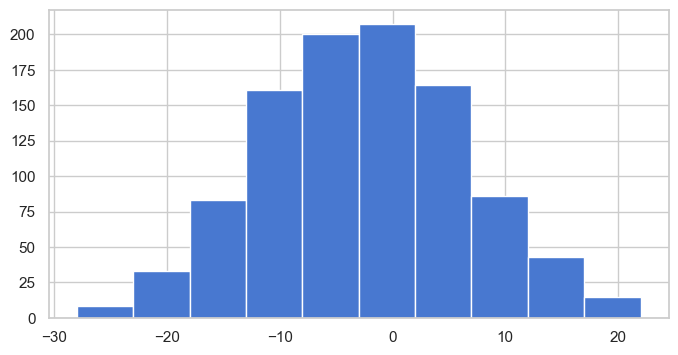

In [36]:
plt.hist((math_sample-reading_sample))
plt.show()

__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ Я выбрал парный t-test, потому что в данном случае объекту из первой выборки однозначно соотвествует объект из второй выборки

Предпосылки:
* Нормальность распределения разности - данная предпосылка собладется (видно по графику выше)
* Независимость разностей - тоже собладется, так как как результаты соотвествуют результатам отдельного человека, не связанного с другими

## Задача №2:  О мышах и людях

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/vagon.jpeg?raw=true" width="400" align='left'>

Для изучения аспектов процесса принятия моральных решений психологи уже много лет используют этические дилеммы, с помощью которых оценивают действия людей в гипотетических ситуациях. Один из самых известных примеров — это [проблема вагонетки,](https://ru.wikipedia.org/wiki/Проблема_вагонетки) в которой необходимо принять решение о том, стоит ли пожертвовать одним человеком для спасения пятерых.

Бельгийские психологи воплотили дилемму в реальную жизнь. Участники эксперимента должны были выбрать, ударить током пять мышей или одну мышь. Эксперимент проходил следующим образом. Участника сажали перед двумя клетками, в одной из которых сидели пять мышей, а в другой — одна. Перед клетками стоял ноутбук с $20$-секундным таймером: участникам сообщили, что по истечении этих $20$ секунд в клетку с пятью мышами пустят ток, и мыши получат не смертельный, но очень болезненный удар. Пока время идет, участник может нажать на кнопку: в этом случае ток пустят по клетке с одной мышью. В исследовании использовали живых мышей. 

Удары тока были ненастоящими: сразу же после «удара» участников сопроводили в отдельную комнату, где разъяснили им, что мыши в полном порядке и током их не били (об этом заранее догадались только $12$ участников). В решении реальной проблемы вагонетки приняли участие $192$ человека, а еще $83$ решали такую же задачку, но гипотетическую (на бумаге). Все участники также прошли онлайн-опросы, в ходе которых учёные собрали о респондентах кучу дополнительной информации. 

В файле `mouse.csv` лежит информация о том, как прошёл эксперимент. Нас будут интересовать столбцы: 

* __STUDY:__ какую проблему вагонетки решал человек $1$, если на бумаге и $2$, если реальную
* __AGE:__ возраст респондента 
* __GENDER:__ пол респондента
* __DECISION:__ решение дилеммы ($1$ - жать на кнопу, $0$ - не жать) 
* __RT:__ время, которое респондент потратил, чтобы нажать на кнопку 

Подробное описание данных, сами данные и даже код на R, использованный при оценивании моделей, можно найти в [репозитории исследования.](https://osf.io/kvb99/) В статье авторы строили несколько логистических регрессий, чтобы очистить эффект от психологических особенностей респондентов. Про подобные приёмы очистки мы немного поговорим позже.  Также более подробно про исследование [можно почитать на N + 1.](https://nplus1.ru/news/2018/05/11/mice-trolley)

In [37]:
df = pd.read_csv('data/mouse.csv', sep='\t')

# отбираем нужные колонки
df = df[['STUDY', 'AGE', 'GENDER', 'DECISION', 'RT']]

# удаляем пропуски по колонке DECISION (то есть тех, кто не смог принять решение)
df = df[~df.DECISION.isnull()]

__а)__ __[5 баллов]__ Попытаемся ответить на тот же вопрос, что и исследователи. В какой из двух ситуаций респонденты чаще принимают решение нажать кнопку: в реальной или на бумаге?

Уровень значимости: $5\%$

$$
\begin{aligned}
&H_0: \hspace{2mm} p_1 = p_2 \hspace{2mm} \text{(На бумаге и в реальности жмут на кнопку одинаково часто)} \\
&H_1: \hspace{2mm} p_1 > p_2  \hspace{2mm} \text{(На бумаге на кнопку жмут чаще)}
\end{aligned}
$$

In [38]:
from statsmodels.stats.proportion import proportions_ztest
realized_paper = df[df['STUDY'] == 1]['DECISION'].sum()
realized_real = df[df['STUDY'] == 2]['DECISION'].sum() 
n_paper = df[df['STUDY'] == 1]['DECISION'].count()
n_real = df[df['STUDY'] == 2]['DECISION'].count()
p_val = proportions_ztest([realized_paper, realized_real], [n_paper, n_real])[1]
print(f'P-value равен примерно {round(p_val, 3)}')
if p_val > alpha:
    print('Нулевая гипотеза НЕ отвергается')
else:
    print('Нулевая гипотеза отвергается. На бумаге на кнопку жмут чаще')

P-value равен примерно 0.017
Нулевая гипотеза отвергается. На бумаге на кнопку жмут чаще


__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ тут я использовал z-test для разности долей. У него достаточно мало предпосылок, т.к. используется распределение Бернулли. Чтобы гипотеза работала, необходимо большое количество наблюдений и независимость. Обе эти предпосылки соблюдаются, так как в эксперименте приняло участие много людей, и люди, участовавшие в эксперименте на листе, потом не принимали участие в "реальном" эксперименте.

__б)__ __[5 баллов]__  Кровожадные люди быстро берут на себя ответственность за удар мышки током. Будем считать, что кровожадные люди принимают решение менее, чем за пять секунд. Правда ли, что люди по своей природе кровожадные? 

Уровень значимости: $5\%$

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu \le 5 \hspace{2mm} \text{(Люди кровожадны)} \\
&H_1: \hspace{2mm} \mu > 5  \hspace{2mm} \text{(Люди не кровожадны)}
\end{aligned}
$$

In [39]:
time_sample = df['RT'].dropna().values
p_val = ztest(time_sample, alternative='larger')[1]
print(f'P-value равен примерно {round(p_val, 3)}')
if p_val > alpha:
    print('Нулевая гипотеза НЕ отвергается')
else:
    print('Нулевая гипотеза отвергается. Люди не кровожадны')

P-value равен примерно 0.0
Нулевая гипотеза отвергается. Люди не кровожадны


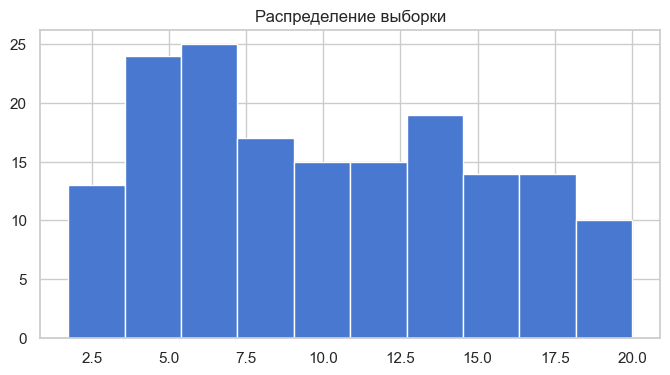

In [40]:
plt.hist(time_sample)
plt.title('Распределение выборки');

__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ Я выбрал z-test. у него следующие предпосылки:
* Распределение выборки не обязательно нормальное. Эта предпосылка соблюдена: распределение не нормальное, а скорее равномерное
* Объем выборки большой. Да, это так - наблюдений больше 100

## Задача №3:  Парадокс

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/simpson.jpg?raw=true" width="350" align='left'>

Помимо решения задач и применения различных функций из библиотек необходимо очень аккуратно работать с данным и понимать, какие действия корректны, а какие нет. Перед вами результаты медицинских исследований: 

- из $1650$ мужчин, принимавших лекарство, выздоровели $770$, 
- из $223$ мужчин, не принимавших лекарство, выздоровели $88$,
- из $245$ женщин, принимавших лекарство, выздоровели $165$,
- из $750$ женщин, не принимавших лекарство женщин, выздоровели $440$.

Необходимо найти ответы на следующие вопросы: 

1. Влияет ли лекарство на мужчин?
2. Влияет ли лекарство на женщин? 
3. Влияет ли лекарство на людей обоих полов в целом?

Будем считать, что исследование проводилось методом двойного слепого тестирования. Врач не знал, даёт ли он пациенту плацебо или лекарство, пациент не знал, пьёт ли он плацебо или лекарство. 

Запишем данные в табличку. Пусть $A$ — принимавшие лекарство, $\overline{A}$ — не принимавшие лекарство, $B$ — выздоровевшие, $\overline{B}$ — не выздоровевшие.

<!--<img width="60%" src="pics/pic2.png">-->
<table>
<tr><td>
    
|Мужчины| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 770 | 880 |
|$\overline{A}$| 88 | 135 |

</td><td>
    
|Женщины| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 165 | 80 |
|$\overline{A}$| 440 | 310 |

</td><td>

|Вместе| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 935 | 960 |
|$\overline{A}$| 528 | 445 |

</td></tr> </table>

Для решения задачи воспользуйтесь критерием хи-квадрат Пирсона. Мы его не разбирали на семинарах, однако на курсе матстата он у вас был. Вспомнить как он работает можно [в этом видео.](https://www.youtube.com/watch?v=bws1CB9XZ6E&list=PLCf-cQCe1FRyCcf47wwBlDObNcz4ud2_L&index=10) Посмотреть на код можно [в этом видео.](https://www.youtube.com/watch?v=H3NtBN_o-hk&list=PLCf-cQCe1FRyCcf47wwBlDObNcz4ud2_L&index=12) Тетрадку с кодом можно [найти тут.](https://github.com/FUlyankin/matstat-AB/blob/main/week10_nonparam_bootstrap/04_05_python_kolmogorov_pearson.ipynb)

Тест поможет нам понять, есть ли у лекарства какой-то эффект. Применить тест в python помогает функция `chi2_contingency` из пакета `scipy.stats`. Используйте её с параметром `correction=False`.

__а)__ __[5 баллов]__ Давайте попробуем найти ответ на вопрос, есть ли эффект от лекарства для мужчин? 

Давайте предварительно посчитаем долю выздровевших мужчин, которые принимали лекарство и долю выздровевших мужчин, которые не принимали лекартсво. Сравните эти доли.

In [41]:
print(f'Доля выздоровевших мужчин, которые принимали лекарство составляет {880/(770+880)}')
print(f'Доля выздоровевших мужчин, которые НЕ принимали лекарство составляет {88/(135+88)}')

Доля выздоровевших мужчин, которые принимали лекарство составляет 0.5333333333333333
Доля выздоровевших мужчин, которые НЕ принимали лекарство составляет 0.39461883408071746


Создадим матрицу размера $2 \times 2.$ Внесём в неё частоты, полученные для мужчин.

In [42]:
men = np.array([[770,880],[88,135]])

Примените тест с параметром `correction=False` и сделайте выводы на уровне значимости $5\%.$

In [43]:
p_val = sts.chi2_contingency(men, correction=False)[1]
print(f'P-value равен примерно {round(p_val, 3)}')
if p_val > alpha:
    print('Нулевая гипотеза НЕ отвергается. Для мужчин у лекарства нет эффекта')
else:
    print('Нулевая гипотеза отвергается. Для мужчин у лекарства действительно есть эффект')

P-value равен примерно 0.043
Нулевая гипотеза отвергается. Для мужчин у лекарства действительно есть эффект


__б)__ __[10 баллов]__ Сделайте всё то же самое, но руками, без помощи библиотеки.

Для того, чтобы расчитать тестовую стаститику хи-квадрат, нам необходимо найти матрицу ожидаемых частот, такую же, которая у нас получилась в предыдущем пункте в output-е функции `chi2_contingency`. 

Используя матрицу из предыдущего пункта, посчитайте общее количество испытуемых мужчин.

In [44]:
n_men = sum([sum(k) for k in men])
print(f'Общее количество испытуемых мужчин составляет {n_men}')

Общее количество испытуемых мужчин составляет 1873


Посчитайте отдельно количество испытуемых мужчин, которые принимали лекарство, и которые не принимали его $(n1, n2)$

In [45]:
n1 = 770+880
n2 = 88+135
print(f'Количество мужчин, принимавших лекарство составляет {n1}, а не принимавших - {n2}')

Количество мужчин, принимавших лекарство составляет 1650, а не принимавших - 223


Найдите вероятности выздороветь или нет (независимо от группы по приему/не приему лекарства), то есть вероятность попасть в $B$ и $\overline{B}$ для мужчин.

In [46]:
p_to_heal = (770+88)/n_men
p_not_to_heal = (880+135)/n_men
print(f'Вероятность выздороветь составляет {p_to_heal}, а не выздороветь - {p_not_to_heal}')

Вероятность выздороветь составляет 0.4580886278697277, а не выздороветь - 0.5419113721302723


Расчитайте ожидаемые (теоритические) значения для каждой ячейки матрицы. Для этого перемножьте вероятности из предыдущего пункта со значениями $n_1$ и $n_2$. Полученную матрицу можно сравнить с выводом библиотеки`scipy.stats`, она должна быть идентичной.

In [47]:
sts.chi2_contingency(men, correction=False) #для сравнения таблица, которая выводится из библиотеки

(4.107854906463222,
 0.04268446899604581,
 1,
 array([[755.84623599, 894.15376401],
        [102.15376401, 120.84623599]]))

In [48]:
expected_table = [[n1*p_to_heal, n1*p_not_to_heal], [n2*p_to_heal, n2*p_not_to_heal]] # самостоятельно рассчитанная таблица
print(np.array(expected_table))

[[755.84623599 894.15376401]
 [102.15376401 120.84623599]]


Расчитайте наблюдаемую статистику и найдите `p_value` с помощью `sts.chi2.cdf` с параметром `df=1`.

\begin{equation*} \chi^2_d = \sum {\frac {(O-E)^2}{E}},\end{equation*}

где

- $E$ - наши ожидаемые частоты(матрица из предыдущего пукта),
- $O$ - наблюдаемы частоты(первоначальная матрица).

In [49]:
def chi2_self_made(fact_table, expected_table, raws=2, columns=2):
    """ 
    out:
    (statistic, p_value)
    """
    res = []
    for i in range(raws):
        for j in range(columns):
            point = (fact_table[i][j] - expected_table[i][j]) ** 2 / expected_table[i][j]
            res.append(point)
    res = sum(res)
    p_val = (1 - sts.chi2.cdf(res, df=(raws-1)*(columns-1)))
    return (res, p_val)


In [50]:
print(f'p-value для нашего теста составляет {chi2_self_made(men, expected_table)[1]}')

p-value для нашего теста составляет 0.04268446899604583


In [51]:
p_val = chi2_self_made(men, expected_table)[1]
if p_val > alpha:
    print('Нулевая гипотеза НЕ отвергается. Для мужчин у лекарства нет эффекта')
else:
    print('Нулевая гипотеза отвергается. Для мужчин у лекарства действительно есть эффект')

Нулевая гипотеза отвергается. Для мужчин у лекарства действительно есть эффект


__в)__ __[5 баллов]__  Ответьте на вопрос: есть ли эффект от лекарства для женщин? (повторите процедуру пункта а) 

Как и в предыдущий раз, для начала, посчитайте долю выздровевших женщин, которые принимали лекарство и долю выздровевших женщин, которые не принимали лекартсво. Сравните эти доли.

In [52]:
print(f'Доля выздоровевших женщин, которые принимали лекарство составляет {165/(165+80)}')
print(f'Доля выздоровевших женщин, которые НЕ принимали лекарство составляет {440/(440+310)}')

Доля выздоровевших женщин, которые принимали лекарство составляет 0.673469387755102
Доля выздоровевших женщин, которые НЕ принимали лекарство составляет 0.5866666666666667


Создайте матрицу с данными из таблицы по женщинам, примените тест с параметром `correction=False` и сделайте выводы на уровене значимости $5\%$.

In [53]:
women = np.array([[165, 80], [440, 310]])
p_val = sts.chi2_contingency(women, correction=False)[1]
print(f'P-value равен примерно {round(p_val, 3)}')
if p_val > alpha:
    print('Нулевая гипотеза НЕ отвергается. Для женщин у лекарства нет эффекта')
else:
    print('Нулевая гипотеза отвергается. Для женщин у лекарства действительно есть эффект')

P-value равен примерно 0.016
Нулевая гипотеза отвергается. Для женщин у лекарства действительно есть эффект


__г)__ __[5 баллов]__  Ответьте на вопрос: есть ли эффект от лекарства для объединенной группы?

In [54]:
gender_neutrality_group = np.array([[935, 960], [528, 445]])
p_val = sts.chi2_contingency(gender_neutrality_group, correction=False)[1]
print(f'P-value равен примерно {round(p_val, 3)}')
if p_val > alpha:
    print('Нулевая гипотеза НЕ отвергается. Для женщин у лекарства нет эффекта')
else:
    print('Нулевая гипотеза отвергается. Для объединенной группы у лекарства действительно есть эффект')

P-value равен примерно 0.012
Нулевая гипотеза отвергается. Для объединенной группы у лекарства действительно есть эффект


In [55]:
print(f'Доля выздоровевших людей, которые принимали лекарство составляет {935/(935+960)}')
print(f'Доля выздоровевших людей, которые НЕ принимали лекарство составляет {528/(528+445)}')

Доля выздоровевших людей, которые принимали лекарство составляет 0.49340369393139843
Доля выздоровевших людей, которые НЕ принимали лекарство составляет 0.5426515930113053


Соотносится ли это с результатами по группам мужчин и женщин, взятых отдельно?

In [56]:
print('Нет, не соотносится, так как в случае с объединенной группой у лекарства есть эффект, однако он отрицательный, исходя из вероятности выздороветь для группы принимавшей и не принимавшей лекарства. В то же время для мужчин и женщин у лекарств эффект положительный.')

Нет, не соотносится, так как в случае с объединенной группой у лекарства есть эффект, однако он отрицательный, исходя из вероятности выздороветь для группы принимавшей и не принимавшей лекарства. В то же время для мужчин и женщин у лекарств эффект положительный.


## Что произошло?

Если вы все сделали правильно, скорее всего у вас получились противоречивые значимые результаты. Давайте разберемся почему это так.

Может произойти такая ситуация, что новое лекарство может оказаться эффективным в каждом из отдельных исследований, на каждой отдельной группе, но объединение результатов укажет на то, что это лекарство либо бесполезно, либо вредно. [Это называется __парадокс Симпсона.__](https://ru.wikipedia.org/wiki/Парадокс_Симпсона) Он довольно часто встречается на практике в разном виде. 

Проблема здесь в том, что объединять эти выборки просто слив данные вместе — нельзя. Контрольные группы людей, не принимавших лекарство, занимают разный объем от выборок — примерно 12% в случае мужчин и 75% в случае женщин.

# Часть 2: А/Б-тестирование

## Задача №4: Не подглядывать!

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/trump.png?raw=true" width="500" align='left'>

На американских выборах 2020 года в некоторых штатах проходила очень конкурентная борьба между кандидатами. По мере подсчета голосов перевес в голосах склонялся то в пользу демократов, то в пользу республиканцев. И вот, в один из таких моментов, когда чаша весов склонилась в пользу республиканцев, Д. Трамп написал в твиттер "stop the count!", что означало призыв к остановке подсчета голосов. 

_Здесь у вас мог возникнуть вопрос, и зачем нам это?_ 

Ответ очень прост. В этой ситуации всем очевидно, что призыв Трампа не мог быть осуществлен, то есть прерывать подсчет голосов раньше времени кажется довольно глупым способом выявления победителя. И вот абсолютно такой же способ принятия решения есть и в А/Б-тестах, только теперь многим аналитикам он уже кажется не столь очевидным, что приводит к существенным ошибкам в заключении выводов. 

_Решив эту задачу, мы познакомимся с такой проблемой подробнее и поймем, как не стоит делать, когда вы запускаете А/Б-тест._

Чтобы понять, в чем же именно заключается проблема, мы с вами будем проводить симуляции А/Б-тестов. Это когда мы генерируем данные уже со знаниями, как эти данные устроены. А затем, запуская процедуру проверки гипотез над такими симулированными данными, мы будем оценивать, что происходит на практике (при запуске А/Б-теста).

На практике же всегда неизвестно, как устроены данные, и проводя А/Б-тест мы пытаемся зафиксировать различия. Еще раз, здесь же мы будем знать об устройстве данных, а затем будем смотреть на поведение А/Б-теста, то есть как будто бы смотреть на тест с обратной стороны. 

_Перед тем как идти дальше, остановитесь здесь и еще раз зафиксируйте это!_

__а) [10 баллов]  Подсчет размера выборки для А/Б-теста__

Предположим, что вы хотите провести А/Б-тест внутри вашего приложения. Вы выбрали некоторую метрику $X$ – случайную величину из нормального распределения с мат. ожиданием $100$ у.е. и стандартным отклонением $40$ у.е – это ваш бейзлайн (группа А). Рассчитайте, сколько дней вам нужно крутить такой А/Б-тест, если:

1. Вы ожидаете получить минимальный размер эффекта в $5$ у.е.;
2. Вы хотите зафиксировать ошибку первого рода на уровне $\alpha=5\%$, а ошибку второго рода на уровне $\beta=20\%$;
3. Вы точно знаете, что в группе Б стандартное отклонение метрики составляет также $20$ у.е.
4. Посещаемость вашего приложения ежедневно составляет $200$ пользователей, и вы готовы раскатить тест на $100\%$ трафика.

Формула для расчета числа наблюдений _для одной группы_:

$$
n_{\text{one group}} = \frac{(\sigma_A^2 + \sigma_B^2) \cdot (z_{1-\frac{\alpha}{2}} + z_{1-\beta})^2}{MDE^2},
$$

__Подсказка:__ Помните, что после получения общего числа наблюдений вам нужно выразить это в дни! Вы должны получить целое число. Также будьте аккуратны с подсчетом трафика и кол-ва наблюдений – обратите внимание, со скольким числом групп вы работаете!

In [57]:
sigma_a = 40 #записываю условия
MDE = 5
alpha = 0.05
beta = 0.2
sigma_b = 40

In [58]:
z_alpha = sts.norm.ppf((1-alpha/2))
z_beta = sts.norm.ppf((1-beta))
n_one_group = ( (sigma_a**2 + sigma_b**2) * (z_alpha + z_beta)**2 ) / MDE**2
days = np.ceil(((n_one_group*2)/200))
print(f'A/Б тест надо будет крутить {int(np.ceil(days))} дней')

A/Б тест надо будет крутить 11 дней


In [59]:
print(n_one_group)

1004.6566059966833


__б) [25 баллов] Симуляция А/Б-теста__

Теперь нам нужно запустить А/Б-тест. Для этого:

1. Сгенерируйте выборку данных из нормального распределения для группы А и Б в конкретный один день. Считайте, что в группе Б математическое ожидание составляет $105$ у.е., то есть с учетом размера вашего минимального ожидаемого эффекта из предыдущего пункта.

In [60]:
sample_A = sts.norm.rvs(loc=100, scale = sigma_a, size = 100, random_state = 101)
sample_B = sts.norm.rvs(loc=105, scale = sigma_a, size = 100, random_state = 41)

2. Теперь представим, что наш тест был запущен $X$ дней. Напишите функцию, которая за этот период теста собирает в `DataFrame` следующие данные на каждый день теста: 
    1. среднее метрики в группе А
    2. среднее метрики в группе Б
    3. p-value, посчитанное с помощью t-test – можно воспользоваться встроенной функцией `scipy.stats.ttest_ind`
    
    Соберите `DataFrame` для $X=50$.
    
__Подсказка:__ Среднее для 1-го дня должно считаться по пользователям, пришедших в первый день, для второго дня – по пользователям, пришедшим в первый и второй день и т.д. То есть накопленным итогом за каждый день теста.

In [61]:
def run_AB_test(X, loc_b, random_state = 101):
    np.random.seed(random_state)
    days = np.arange(1, X + 1)
    results = []
    sample_A = []
    sample_B = []

    for day in days:
        sample_A_add = np.random.normal(loc=100, scale=40, size=100)
        sample_B_add = np.random.normal(loc=loc_b, scale=40, size=100)
        
        sample_A.extend(sample_A_add)
        sample_B.extend(sample_B_add)

        mean_A = np.mean(sample_A)
        mean_B = np.mean(sample_B)

        t_statistic, p_value = sts.ttest_ind(sample_A, sample_B)

        results.append([mean_A, mean_B, p_value])

    df_results = pd.DataFrame(results, columns=['Mean_A', 'Mean_B', 'p-value'])
    return df_results
# Испольовался GPT, подводка - условие задания, но он сделал не кумулятивные подсчеты, я это исправил

In [62]:
df = run_AB_test(50, 105)
df

,Mean_A,Mean_B,p-value
0,106.654795,102.206734,4.494393e-01
1,104.444779,103.391239,8.013480e-01
2,102.678175,104.356435,6.288578e-01
3,103.121770,103.036499,9.772459e-01
4,103.086261,104.028347,7.236101e-01
5,101.910691,104.704873,2.438118e-01
6,102.517450,104.514507,3.701786e-01
7,101.998402,104.663693,1.976121e-01
8,102.120464,105.781202,5.971816e-02
9,101.829943,106.158288,2.016572e-02


3. На основе `DataFrame` из предыдущего пункта постройте график динамики среднего в группе А и в группе Б по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится.

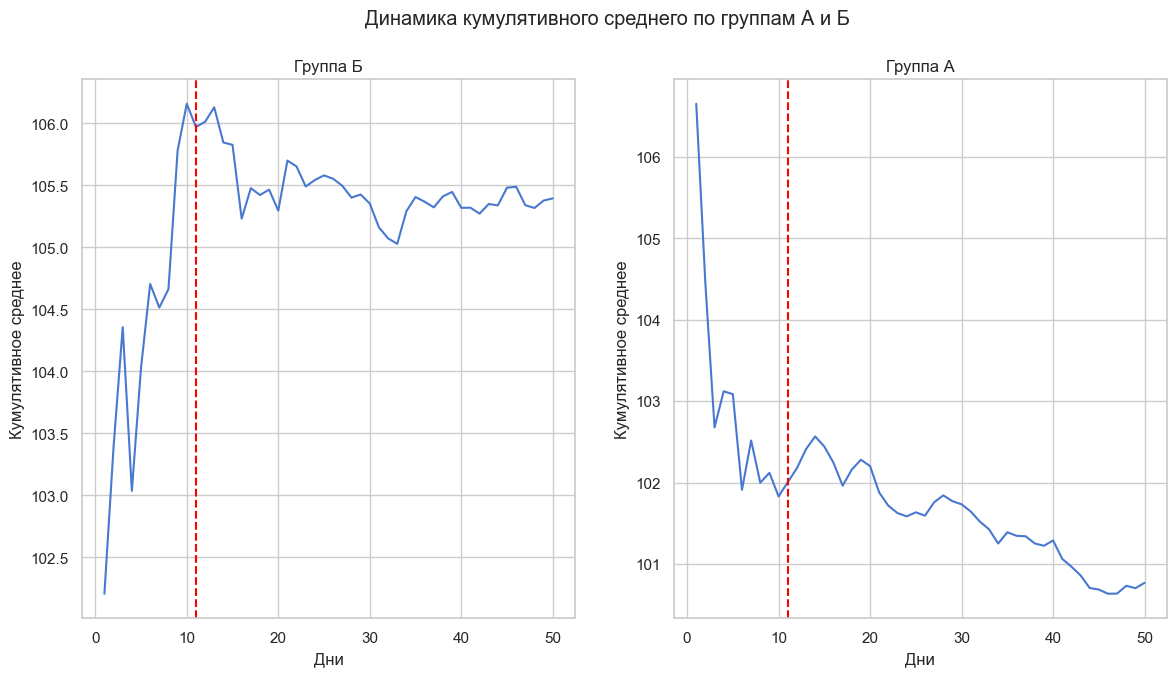

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

ax1.plot(range(1, 51), df['Mean_B'])
ax1.set_title('Группа Б')
ax1.set_xlabel('Дни')
ax1.set_ylabel('Кумулятивное среднее')
ax1.axvline(x=11, linestyle='--', color='red')

ax2.plot(range(1, 51), df['Mean_A'])
ax2.set_title('Группа А')
ax2.set_xlabel('Дни')
ax2.set_ylabel('Кумулятивное среднее')
ax2.axvline(x=11, linestyle='--', color='red')

plt.suptitle('Динамика кумулятивного среднего по группам А и Б')
plt.show()


4. На основе `DataFrame` из предыдущего пункта постройте график динамики p-value по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится. Также отложите горизонтальную линию – ваш уровень значимости $\alpha$.

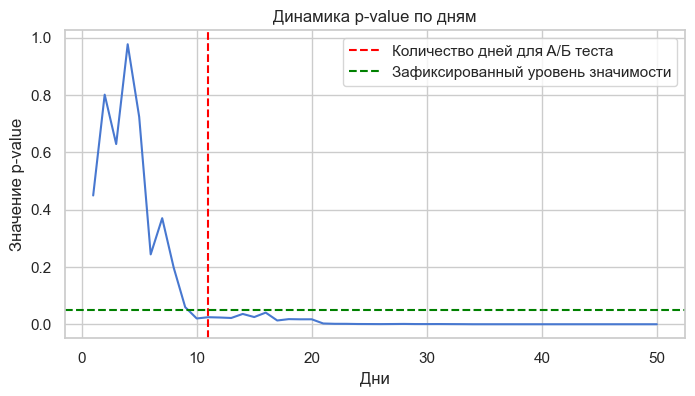

In [64]:
plt.plot(range(1, 51), df['p-value'])
plt.title('Динамика p-value по дням')
plt.xlabel('Дни')
plt.ylabel('Значение p-value')
plt.axvline(x=11, linestyle='--', color='red', label='Количество дней для A/Б теста') 
plt.axhline(y=0.05, linestyle='--', color='green', label='Зафиксированный уровень значимости') 
plt.legend()
plt.show()

5. Перегенируруйте шаги 2-4 несколько раз, посмотрев на графики. Что вы видите? Что происходит с p-value в периодах:
    1. до кол-ва дней, посчитанных по формуле из п.1
    2. в точке кол-ва дней, посчитанных по формуле из п.1
    3. после кол-ва дней, посчитанных по формуле из п.1
    
    Опишите выводы максимально подробно.

1) Графики динамики кумулятивного среднего. Видно, что до количества дней, посчитанных по формуле из п.1. (11 дней) кумулятивные средние ведут себя непредсказуемо, обладают большим разбросом и зачастую не стремятся к своему истинному математическому ожиданию. Таким образом, если оставить тест крутится меньше подсчитанного периода, может сложиться неверное представление о реальном математическом ожидании. По мере приближения к рассчетному периоду согласно ЦПТ кумулятивное среднее стабилизируется, а после преодоления рассчетной границы в 11 дней, среднее характеризуется уже значительно меньшим разбросом и в среднем стремится к истинному математическому ожиданию.
2) График динамики p-value по дням. В случае кумулятивного p-value ситуация аналогична, но, если судить по нескольким прокруткам, алгоритм работает еще более точно. Пока текущее количество  дней не достигло расчетного, p-value ведет себя непредсказуемо и дает ложные результаты в случае, если остановить тест раньше времени. Это объясняется тем, что наблюдений еще недостаточно, чтобы средние стабилизировались и давали правдивое представление о мат. ожидании. Когда текущее количество дней теста приближается к расчетному или переходит этот порог на +- 1 день, p-value, как правило, падает ниже уровня значимости, гипотеза отвергается. Тест дает правдивые результаты

6. Теперь предположим, что мы поменяли наш $MDE$ до $1$ у.е. То есть мат. ожидание в группе А осталось по-прежнему $100$, а вот в группе Б теперь $101$. Перегенерируйте пункты 2-4 для измененного $MDE$, при этом кол-во дней в п.1 не пересчитывайте. Что происходит с p-value? Сделайте выводы.

In [65]:
df_1 = run_AB_test(50, 101, 51)
df_1

,Mean_A,Mean_B,p-value
0,99.792156,99.486955,0.956647
1,94.803255,100.259363,0.166191
2,97.339128,101.605070,0.187800
3,97.281646,103.261746,0.031740
4,97.975723,102.660449,0.062532
5,98.356696,101.884397,0.121006
6,97.667351,101.202630,0.095150
7,97.870224,100.779719,0.150513
8,98.638183,101.249254,0.167443
9,98.058365,100.351301,0.200672


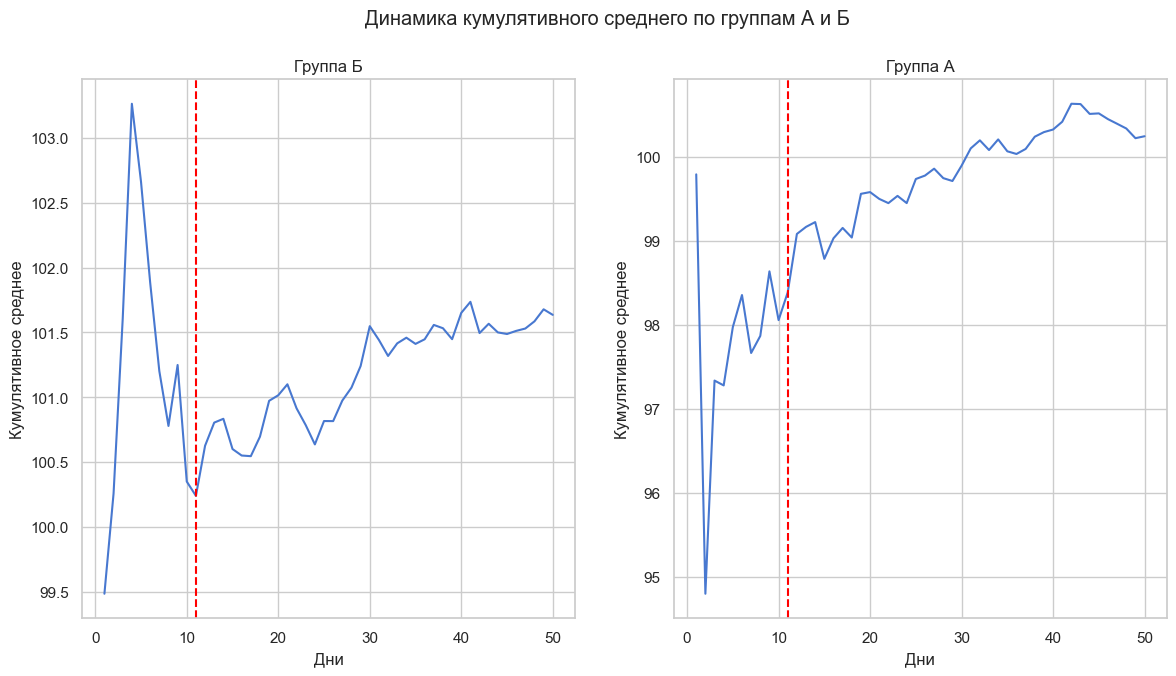

In [66]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

ax1.plot(range(1, 51), df_1['Mean_B'])
ax1.set_title('Группа Б')
ax1.set_xlabel('Дни')
ax1.set_ylabel('Кумулятивное среднее')
ax1.axvline(x=11, linestyle='--', color='red')

ax2.plot(range(1, 51), df_1['Mean_A'])
ax2.set_title('Группа А')
ax2.set_xlabel('Дни')
ax2.set_ylabel('Кумулятивное среднее')
ax2.axvline(x=11, linestyle='--', color='red')

plt.suptitle('Динамика кумулятивного среднего по группам А и Б')
plt.show()


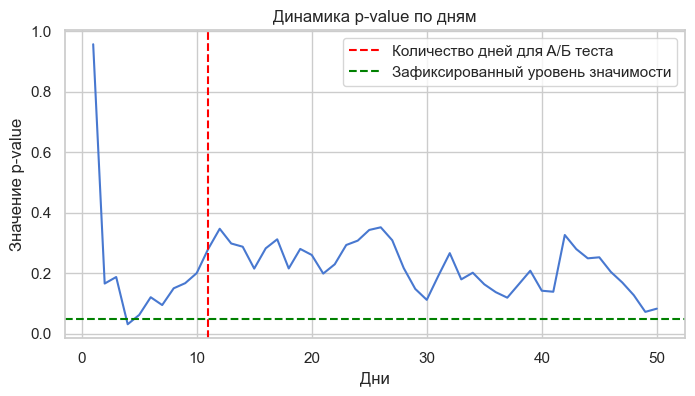

In [67]:
plt.plot(range(1, 51), df_1['p-value'])
plt.title('Динамика p-value по дням')
plt.xlabel('Дни')
plt.ylabel('Значение p-value')
plt.axvline(x=11, linestyle='--', color='red', label='Количество дней для A/Б теста') 
plt.axhline(y=0.05, linestyle='--', color='green', label='Зафиксированный уровень значимости') 
plt.legend()
plt.show()

__Выводы:__ В данном случае из-за того, что математические ожидания отличаются на меньшую величину, нам необходимо "ловить" менее значимые отклонения и, согласно формуле расчета необходимого количества наблюдений, "крутить" А/Б тест дольше. Если оставить количество дней на прежднем уровне, то можно получить ложные результаты, так как p-value до 11 дней, а также довольно продолжительное время после находилось выше уровня значимости. К 11 дням ее значение не успело "стабилизироваться" и ведет себя достаточно беспорядочно, обладает большим разбросом. Особенно это заметно при сопоставлении с ситуацией в пункте б), когда после 11 дней p-value напоминало уже практически прямую линию

__с) [20баллов] Симуляция А/А-теста__

Теперь представим, что изменений на самом деле никаких нету, то есть мат. ожидание в обоих группах $100$, а $MDE = 0$

1. И снова перегенерируйте вышесделанные пункты 2-4. Что происходит с p-value? Может ли оно оказаться ниже уровня значимости? 

In [68]:
df_2 = run_AB_test(50, 100)
df_2.head()

,Mean_A,Mean_B,p-value
0,106.654795,97.206734,0.109046
1,104.444779,98.391239,0.148781
2,102.678175,99.356435,0.338880
3,103.121770,98.036499,0.089243
4,103.086261,99.028347,0.127906


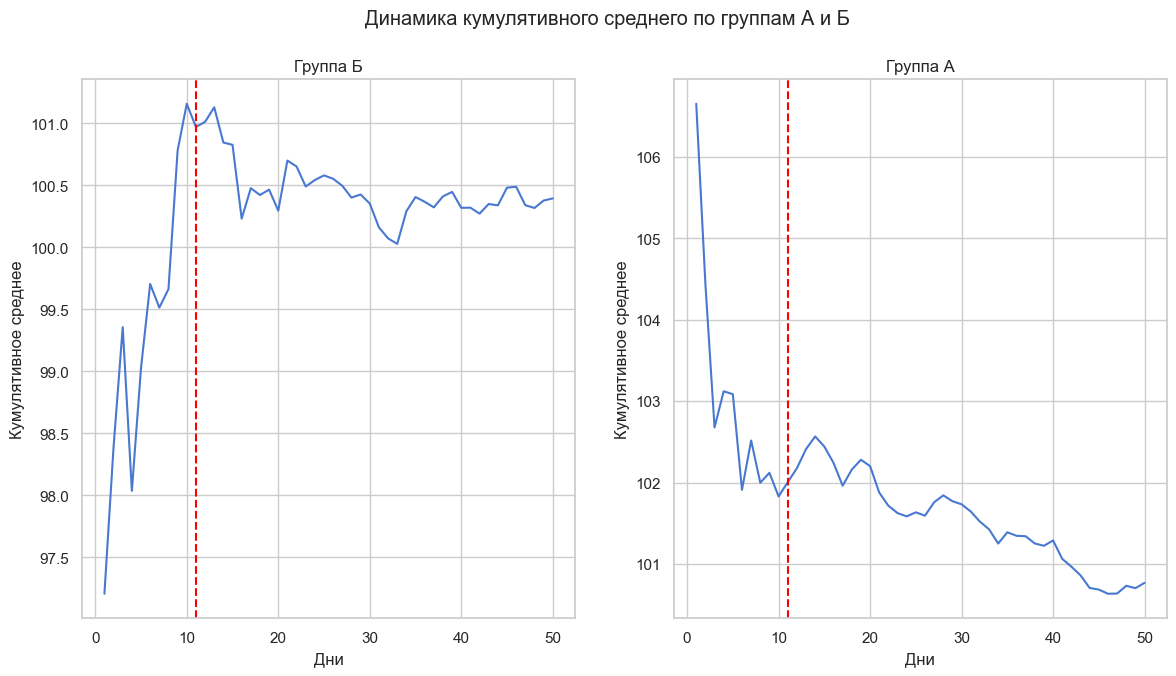

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

ax1.plot(range(1, 51), df_2['Mean_B'])
ax1.set_title('Группа Б')
ax1.set_xlabel('Дни')
ax1.set_ylabel('Кумулятивное среднее')
ax1.axvline(x=11, linestyle='--', color='red')

ax2.plot(range(1, 51), df_2['Mean_A'])
ax2.set_title('Группа А')
ax2.set_xlabel('Дни')
ax2.set_ylabel('Кумулятивное среднее')
ax2.axvline(x=11, linestyle='--', color='red')

plt.suptitle('Динамика кумулятивного среднего по группам А и Б')
plt.show()

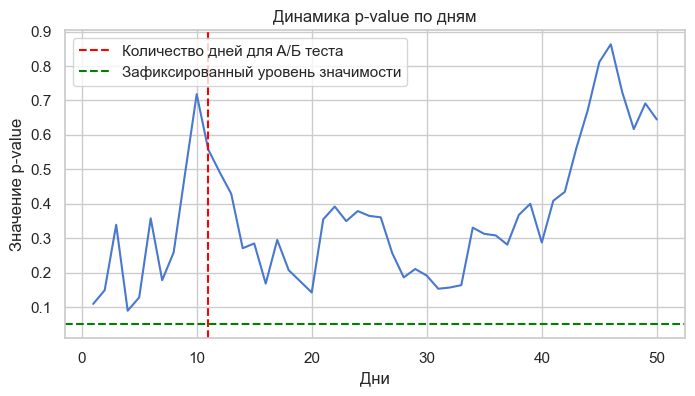

In [70]:
plt.plot(range(1, 51), df_2['p-value'])
plt.title('Динамика p-value по дням')
plt.xlabel('Дни')
plt.ylabel('Значение p-value')
plt.axvline(x=11, linestyle='--', color='red', label='Количество дней для A/Б теста') 
plt.axhline(y=0.05, linestyle='--', color='green', label='Зафиксированный уровень значимости') 
plt.legend()
plt.show()

__Выводы__: в данном случае математические ожидания двух случайных величин равны друг другу, поэтому из логических соображений, p-value всегда должно быть выше уровня значимости, однако на практике это происходит не всегда так, и 11 одиннадцати дней точно недостаточно для того, чтобы однозначно заявить, что гипотеза не отвергается. Во-первых, мы можем видеть, что p-value даже на 50-и днях не стабилизировалась - она очень сильно и беспорядочно скачет. Во-вторых, представим, что на самом деле математические ожидания случаных величин не равны, а отличаются на 0.01. В таком случае необходимо было бы крутить тест оченб долго, чтобы точно понять, чем равна разница математических ожиданий.

2. Ну и напоследок, напишите функцию, которая генерирует p-value на последний день A/A теста. А затем запустите эту функцию $1000$ раз, собрав $1000$ значений p-value. Постройте гистограмму их распределения. Что вы видите? 

__Подсказка:__ Для такой функции достаточно создать выборку один раз, изменив ее размер.

In [71]:
def last_pval(rs):
    df = run_AB_test(50, 100, rs)
    return df['p-value'].iloc[-1]
pvals = []
for k in range(1000):
    pvals.append(last_pval(k))

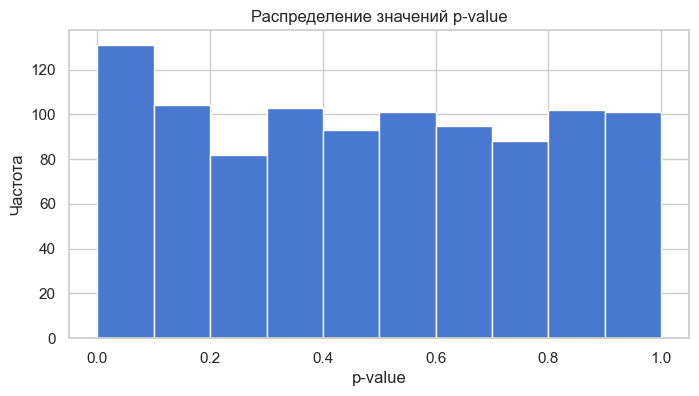

In [72]:
plt.hist(pvals, bins=10)
plt.title('Распределение значений p-value')
plt.xlabel('p-value')
plt.ylabel('Частота')
plt.show()

__Выводы:__
* вывод № 1: в нашем случае математические ожидания двух случайных величин равны друг другу, поэтому наша p-value будет равна значению функции распределения в конкретной точке нормального распределения, поэтому p-value - это случайная величина, которая имеет уже равномерное распределение, так как нулевая гипотеза верна. Если бы нулевая гипотеза была неверна, распределение было бы скошенное.
* вывод №2: так как нулевая гипотза верна, то равномерность полученного распределения отражает взимосвязь уровня значимости и вероятности ошибки первого рода. Например, если для теста мы ставим уровень значимости, равный 0,1, то 9/10 столбцов в гистограмме равномерного распределния будет находится левее, а 0,1 будет находится левее этого значения, хотя мы точно знаем что математические ожидания равны. Это и будет являться вероятностью ошибки первого рода, которая соотвествует уровню значимости. 